# 第二章 感知机


1．感知机是根据输入实例的特征向量$x$对其进行二类分类的线性分类模型：

$$
f(x)=\operatorname{sign}(w \cdot x+b)
$$

感知机模型对应于输入空间（特征空间）中的分离超平面$w \cdot x+b=0$。

2．感知机学习的策略是极小化损失函数：

$$
\min _{w, b} L(w, b)=-\sum_{x_{i} \in M} y_{i}\left(w \cdot x_{i}+b\right)
$$
损失函数对应于误分类点到分离超平面的总距离。

3．感知机学习算法是基于随机梯度下降法的对损失函数的最优化算法，有原始形式和对偶形式。算法简单且易于实现。原始形式中，首先任意选取一个超平面，然后用梯度下降法不断极小化目标函数。在这个过程中一次随机选取一个误分类点使其梯度下降。

4．当训练数据集线性可分时，感知机学习算法是收敛的。感知机算法在训练数据集上的误分类次数$k$满足不等式：

$$
k \leqslant\left(\frac{R}{\gamma}\right)^{2}
$$
当训练数据集线性可分时，感知机学习算法存在无穷多个解，其解由于不同的初值或不同的迭代顺序而可能有所不同。

## 二分类模型

$f(x) = sign(w\cdot x + b)$

给定训练集：

$T=\left\{\left(x_{1}, y_{1}\right),\left(x_{2}, y_{2}\right), \cdots,\left(x_{N}, y_{N}\right)\right\}$

定义感知机的损失函数

$L(w, b)=-\sum_{x_{i} \in M} y_{i}\left(w \cdot x_{i}+b\right)$



### 算法

随即梯度下降法 Stochastic Gradient Descent

随机抽取一个误分类点使其梯度下降。

$w = w + \eta y_{i}x_{i}$

$b = b + \eta y_{i}$

当实例点被误分类，即位于分离超平面的错误侧，则调整$w$, $b$的值，使分离超平面向该无分类点的一侧移动，直至误分类点被正确分类

拿出iris数据集中两个分类的数据和[sepal length，sepal width]作为特征

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# load data
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target

In [4]:
df.columns = [
    'sepal length', 'sepal width', 'petal length', 'petal width', 'label'
]
df.label.value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

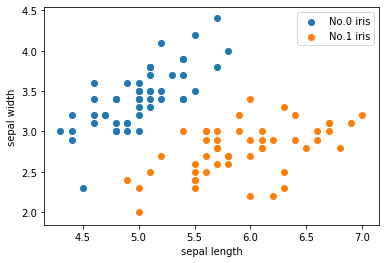

In [5]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='No.0 iris')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='No.1 iris')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [6]:
data = np.array(df.iloc[:100, [0,1,-1]])

In [23]:
X, y = data[:,:-1], data[:,-1]
y = np.array([1 if i == 1 else -1 for i in y])

## 原始形式的感知机

In [8]:
# 数据线性可分，二分类数据
# 此处为一元一次线性方程
class PerceptronBase:
    def __init__(self):
        self.w = np.ones(len(data[0]) - 1, dtype=np.float32)
        self.b = 0
        self.eta = 0.1
        # self.data = data

    def sign(self, x, w, b):
        f = np.dot(x,w) + b
        return f

    # 随机梯度下降法
    def fit(self,X_train,y_train):
        no_wrong = False         # has_wrong的含义是是否存在误分类点，刚开始默认存在误分类点。
        while not no_wrong:      # 一只循环到has_wrong=True，即不存在误分类点
            wrong_count = 0
            for i in range(len(X_train)):
                X = X_train[i]
                y = y_train[i]
                if y * self.sign(X, self.w, self.b) <= 0: 
                    self.w = self.w + self.eta * np.dot(y, X)
                    self.b = self.b + self.eta * y
                    wrong_count += 1        # 每一轮循环都记录调整模型后的误分类点数
            if wrong_count == 0:            # 当误分类点为0时，has_wrong=True，while循环结束
                no_wrong = True
        return 'PerceptronBase Model!'

    def score(self):
        pass

In [9]:
perceptronbase = PerceptronBase()
perceptronbase.fit(X, y)

'PerceptronBase Model!'

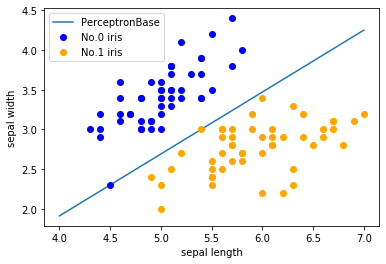

In [10]:
x_points = np.linspace(4, 7, 10)
y_ = -(perceptronbase.w[0] * x_points + perceptronbase.b) / perceptronbase.w[1]
plt.plot(x_points, y_, label='PerceptronBase')

plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='No.0 iris')
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='No.1 iris')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

## scikit-learn实例

In [11]:
import sklearn
from sklearn.linear_model import Perceptron

In [12]:
sklearn.__version__

'0.22.2'

In [13]:
clf = Perceptron(fit_intercept=True,        # intercept是截距
                max_iter = 1000,
                shuffle = True)
clf.fit(X,y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [21]:
# weight
print(clf.coef_)

[[ 23.2 -38.7]]


In [15]:
# 截距
print(clf.intercept_)

[-5.]


Text(0, 0.5, 'sepal width')

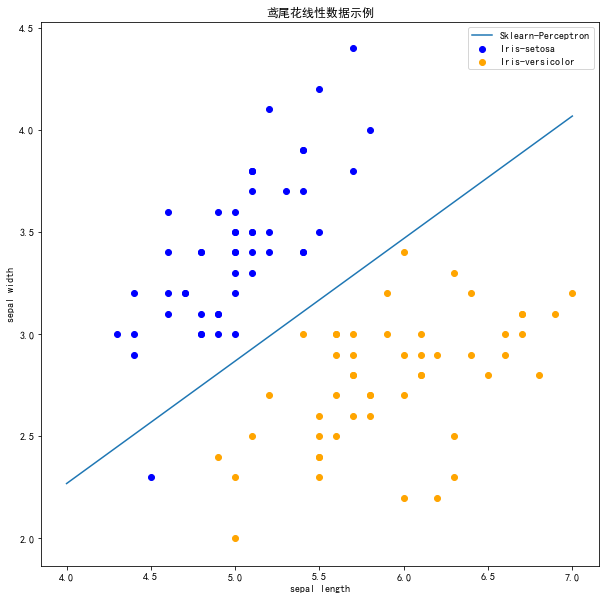

In [19]:
plt.figure(figsize=(10,10))
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.title("鸢尾花线性数据示例")

plt.scatter(data[:50,0],data[:50,1],c='b',label='Iris-setosa')
plt.scatter(data[50:100,0],data[50:100,1],c='orange',label='Iris-versicolor')

#画感知机曲线
x1_points = np.arange(4,8)
y2 = -(clf.coef_[0][0]*x_points + clf.intercept_)/clf.coef_[0][1]       # w1*x1 + x2*x2 + b = 0 -> x2 =  -(w1*x1 + b)/w2
plt.plot(x1_points, y2, label='Sklearn-Perceptron')

plt.legend()
plt.xlabel("sepal length")
plt.ylabel("sepal width")

### 注意！
在上图中，有一个位于左下角的蓝点没有被正确分类，因为sklearn的Perceptron有一个tol参数：它规定了如果本次迭代的损失和上次迭代的损失之差小于一个特定值时，停止迭代。所以我们需要设置tol=None使之可以继续迭代：

Text(0, 0.5, 'sepal width')

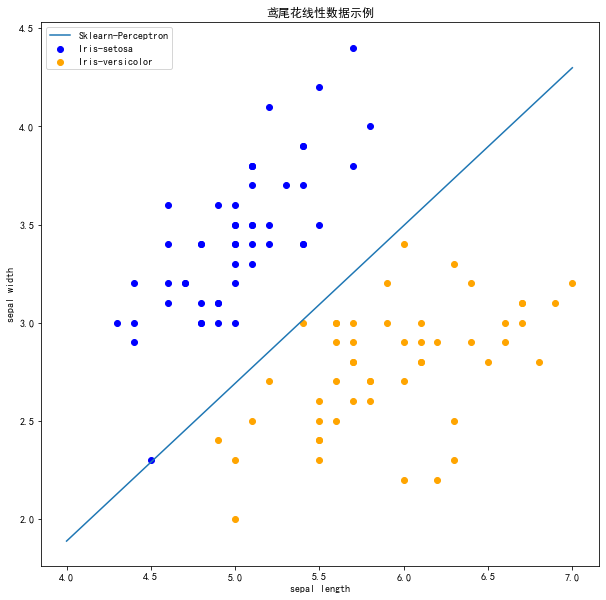

In [111]:
clf = Perceptron(fit_intercept = True,
                max_iter = 1000,
                tol = None,
                shuffle = True)
clf.fit(X,y)

plt.figure(figsize=(10,10))
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.title("鸢尾花线性数据示例")

plt.scatter(data[:50,0],data[:50,1],c='b',label='Iris-setosa')
plt.scatter(data[50:100,0],data[50:100,1],c='orange',label='Iris-versicolor')

#画感知机曲线
x_points = np.arange(4,8)
y_ = -(clf.coef_[0][0]*x_points + clf.intercept_)/clf.coef_[0][1]       # w1*x1 + x2*x2 + b = 0 -> x2 =  -(w1*x1 + b)/w2
plt.plot(x_points, y_, label='Sklearn-Perceptron')

plt.legend()
plt.xlabel("sepal length")
plt.ylabel("sepal width")

现在可以看到，所有的两种鸢尾花都被正确分类了。

## 对偶形式的感知机

In [26]:
class PerceptronDual:
    """
    对偶形态感知机
    """
    def __init__(self):
        self.eta = 0.1

    # 计算Gram Matrix
    def calculate_g_matrix(self, X):
        n_sample = X.shape[0]       # n_sample是每个特征的个数
        self.G_matrix = np.zeros((n_sample, n_sample))
        # 填充Gram Matrix
        for i in range(n_sample):
            for j in range(n_sample):
                self.G_matrix[i][j] = np.sum(X[i] * X[j])

    # 迭代的判定条件
    def judge(self, X, y, index):
        tmp = self.b
        n_sample = X.shape[0]
        for m in range(n_sample):
            tmp += self.alpha[m] * y[m] * self.G_matrix[index][m]

        return tmp * y[index]

    def fit(self, X, y):
        """
        对偶形态的感知机
        由于对偶形式中训练实例仅以内积的形式出现
        因此，若事先求出Gram Matrix，能大大减少计算量
        """
        # 读取数据集中含有的样本数,特征向量数
        n_samples, n_features = X.shape
        self.alpha, self.b = [0] * n_samples, 0
        self.w = np.zeros(n_features)
        # 计算Gram_Matrix
        self.calculate_g_matrix(X)

        i = 0
        while i < n_samples:                      # 对每一个样本点进行处理直到这个样本点不满足误分条件
            if self.judge(X, y, i) <= 0:
                self.alpha[i] += self.eta
                self.b += self.eta * y[i]
                i = 0
            else:
                i += 1

        for j in range(n_samples):
            self.w += self.alpha[j] * X[j] * y[j]

        return "PerceptronDual Model"

In [27]:
perceptrondual = PerceptronDual()
perceptrondual.fit(X, y)

'PerceptronDual Model'

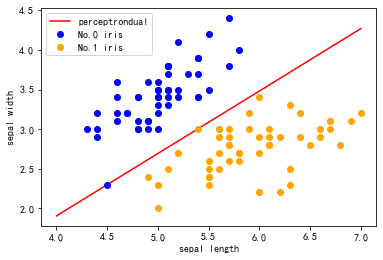

In [28]:
x_points = np.linspace(4, 7, 10)
y_2 = -(perceptrondual.w[0] * x_points + perceptrondual.b) / perceptrondual.w[1]
plt.plot(x_points, y_2, label='perceptrondual', c='r')

plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='No.0 iris')
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='No.1 iris')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()